In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [25]:
xtrain = np.array([1, 2])
ytrain = np.array([300, 500])

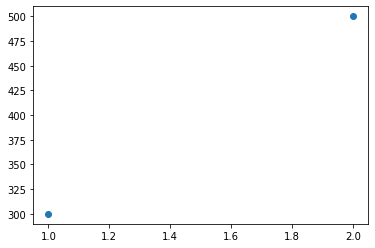

In [26]:
plt.scatter(xtrain ,ytrain)
plt.show()

In [34]:
def computecost(x, y, w, b):
  m = x.shape[0]
  sqrdsum = 0
  for i in range(m):
    fwb = w * x[i] + b
    sqrdsum += (fwb - y[i])**2
  cost = sqrdsum/(2 * m)
  return cost

In [35]:
def computegradient(x,y,w,b):
  dwdj = 0
  dbdj = 0
  m = x.shape[0]
  for i in range(m):
    fwb = w * x[i] + b
    dw_dji = (fwb - y[i]) * x[i]
    db_dji = (fwb - y[i])
    dwdj += dw_dji
    dbdj += db_dji
  dwdj /= m
  dbdj /= m
  return dwdj, dbdj

In [36]:
def gradientdescent(w_in, b_in, x, y, iters, alpha, gradfunc, costfunc):
  w = copy.deepcopy(w_in)
  b = copy.deepcopy(b_in)

  j_history = []

  for i in range(iters):
    dwdj, dbdj = gradfunc(x,y,w,b)

    w = w - alpha * dwdj
    b = b - alpha * dbdj

    j_history.append( costfunc(x, y, w, b) )

  return w, b, j_history


In [37]:
w_init = 0
b_init = 0

iterations = 10000
al = 1e-2

w_final, b_final, j_hist = gradientdescent(w_init, b_init, xtrain, ytrain, iterations, al, computegradient, computecost)

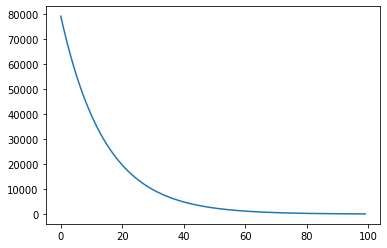

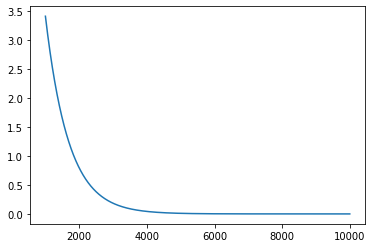

In [38]:
# fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize =(12, 4) )
# ax1.plot( j_hist[:100] )
# ax2.plot( 1000 + np.arange(len(j_hist[1000:]) ), j_hist[1000:] )
# plt.show()

plt.plot( j_hist[:100])
plt.show()
print()
plt.plot( 1000 +  np.arange(len(j_hist[1000:])) , j_hist[1000:] )
plt.show()

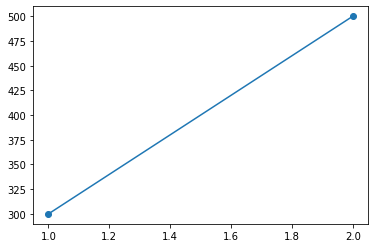

In [39]:
reg = w_final * xtrain + b_final

plt.scatter(xtrain, ytrain)
plt.plot(xtrain, reg)
plt.show()